# **Introduction**

**Overview**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. 
It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. 
The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

This are the fetures in the table:

```plaintext

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
```

## Load the data

In [105]:
# Import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, f1_score


In [47]:
# Reading the CSV file into a DataFram
file_path = r"C:\Users\Lihi\Desktop\Year 2\Semester B\Python\Final Project\datasets\heart\heart.csv"
heart_data = pd.read_csv(file_path)


## Explore the data

In [48]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### In column "target"- 0: no disease and 1: disease

In [49]:
heart_data.shape

(303, 14)

##### There are 14 features and 303 instances in the dataset 

In [50]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [52]:
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## Interesting relationship

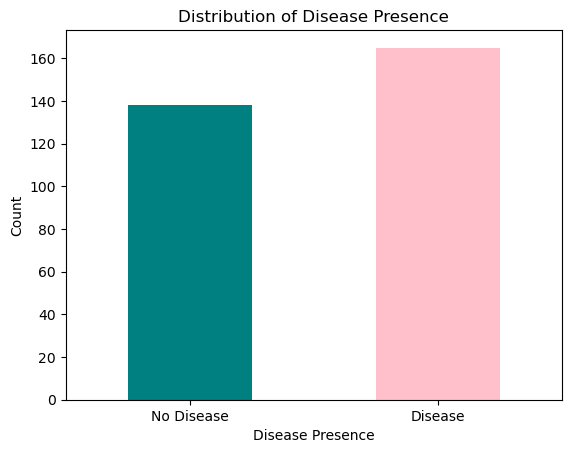

In [53]:
count_data = heart_data['target'].value_counts().sort_index()  
colors = ['teal','pink'] 
count_data.plot(kind='bar', color=colors)  
plt.title('Distribution of Disease Presence')
plt.xlabel('Disease Presence')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'], rotation=0)
plt.show()

 We can see that a majority of patients in our data have heart disease, yet there is no significant difference

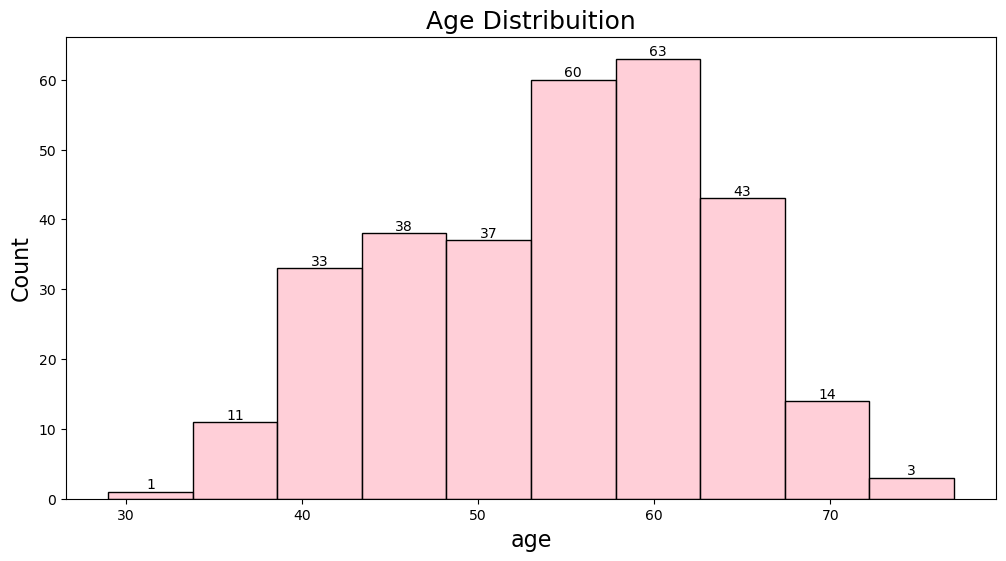

In [54]:
plt.figure(figsize=(12,6))
plt.title('Age Distribuition', fontsize=18)
ax = sns.histplot(heart_data['age'], bins=10, color='pink')
plt.xlabel('age', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

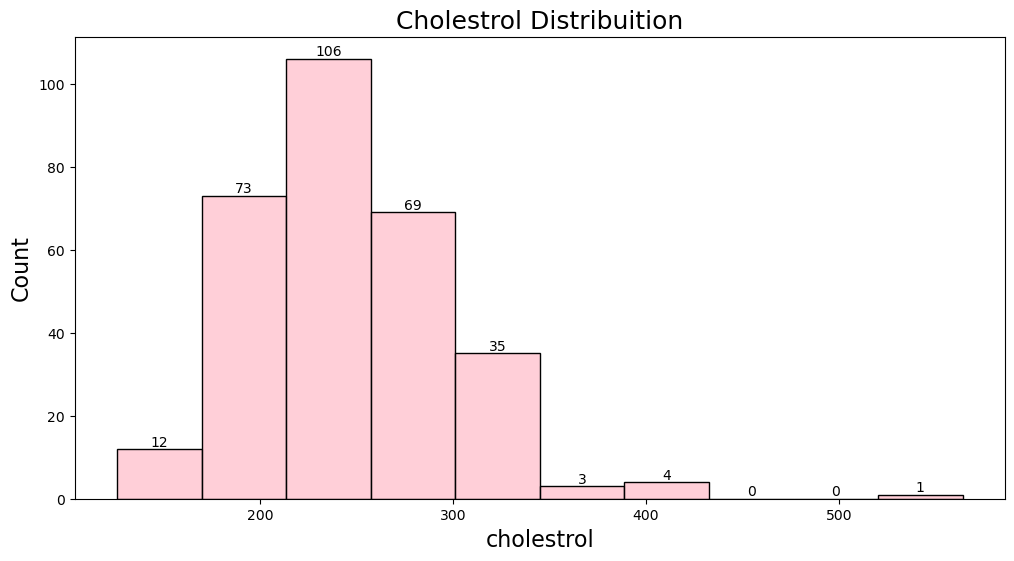

In [55]:
plt.figure(figsize=(12,6))
plt.title('Cholestrol Distribuition', fontsize=18)
ax = sns.histplot(heart_data['chol'], bins=10, color='pink')
plt.xlabel('cholestrol', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

We noticed an extremely high cholesterol value of 564 mg/dL in the data. Typically, a cholesterol level below 200 mg/dL is considered healthy. Levels between 200-239 mg/dL are borderline to dangerous, and levels above 240 mg/dL are categorized as high risk. Given this, we decided to remove the outlier value of 564 mg/dL, as it likely skews our analysis. Additionally, it makes sense that our data shows high cholesterol levels, as many of our patients suffer from heart diseases, which are commonly linked to elevated cholesterol. This indicates that our dataset is reliable.

In [56]:
# Removing the instance 
heart_data = heart_data[heart_data['chol'] != 564]

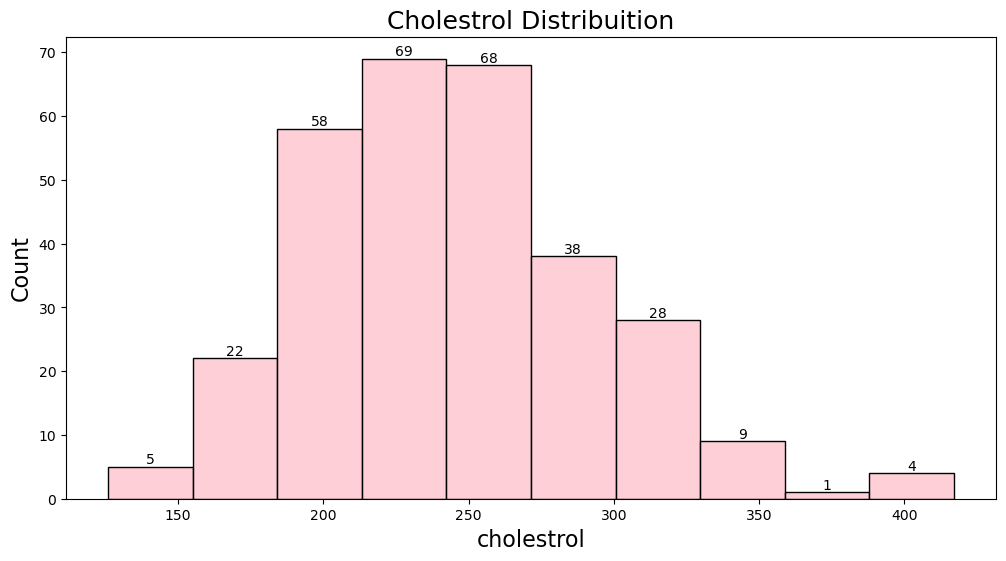

In [57]:
plt.figure(figsize=(12,6))
plt.title('Cholestrol Distribuition', fontsize=18)
ax = sns.histplot(heart_data['chol'], bins=10, color='pink')
plt.xlabel('cholestrol', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

The cholerstrol disturbution without the outlier 

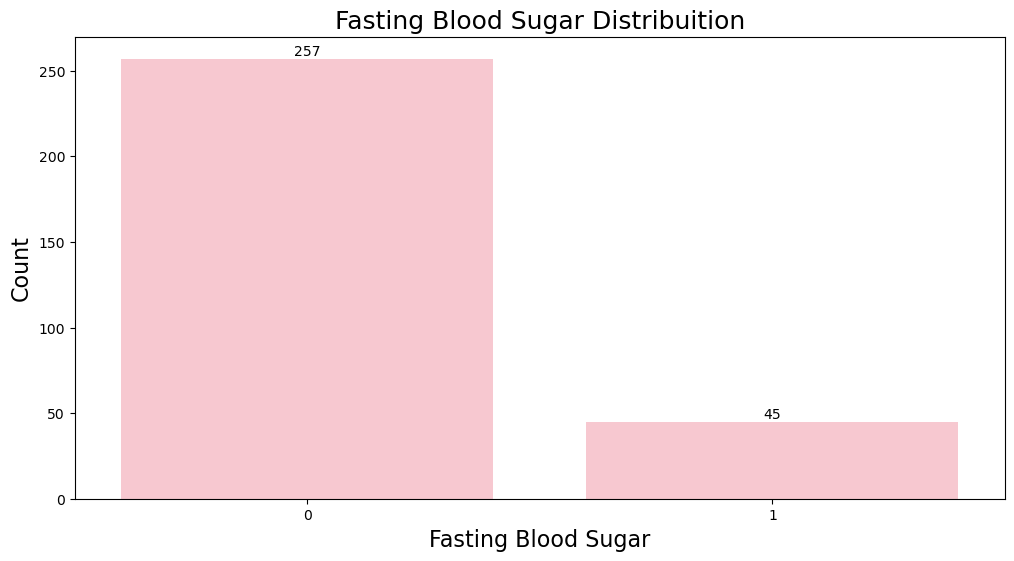

In [58]:
plt.figure(figsize=(12,6))
plt.title('Fasting Blood Sugar Distribuition', fontsize=18)
ax = sns.barplot(x=heart_data['fbs'].value_counts().index, y=heart_data['fbs'].value_counts().values, color='pink')
plt.xlabel('Fasting Blood Sugar', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

We observed that the majority of our patients have fasting blood sugar levels below 120 mg/dL. 

Given that high fasting blood sugar levels are linked to an increased risk of heart disease, and considering that many of our patients suffer from heart conditions, the low incidence of high fasting blood sugar appears inconsistent. This suggests that this feature may not be a reliable indicator in our dataset. Additionally, we suspect that this feature might have a minimal impact on our target variable. We will tprint its correlation with the target to determine whether it should be retained or removed from our model.

In [59]:
correlation = heart_data['fbs'].corr(heart_data['target'])
print(f"The correlation between fasting blood sugar ('fbs') and the target variable is: {correlation}")

The correlation between fasting blood sugar ('fbs') and the target variable is: -0.026825970565970234


In [60]:
heart_data.corr()['target'].drop('target').abs().sort_values()

fbs         0.026826
chol        0.111147
restecg     0.140706
trestbps    0.142466
age         0.230720
sex         0.277867
slope       0.348569
thal        0.348641
ca          0.390431
thalach     0.421096
cp          0.432080
oldpeak     0.432927
exang       0.435601
Name: target, dtype: float64

There is a relatively low correlation (the lowest with the target variable) so we concider droping the column, but desided not to remove the feture.

In [61]:
#heart_data = heart_data.drop('fbs', axis=1)

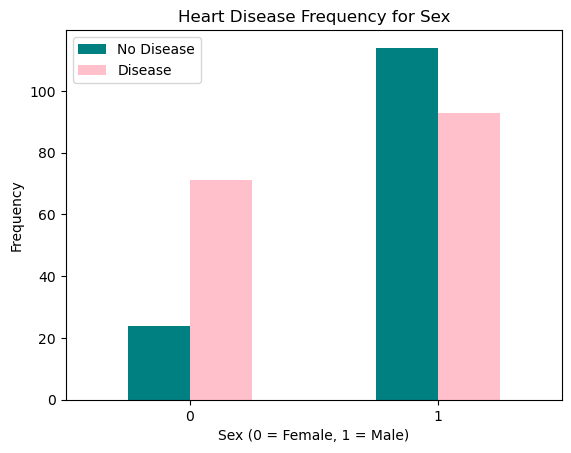

In [62]:
pd.crosstab(heart_data['sex'], heart_data['target']).plot(kind='bar',color=['teal', 'pink'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

##### From the graph, we can conclude that there is a significant difference between the sexes in terms of heart disease prevalence. Among women, the absulote majority have heart disease, whereas among men, the majority do not have heart disease.

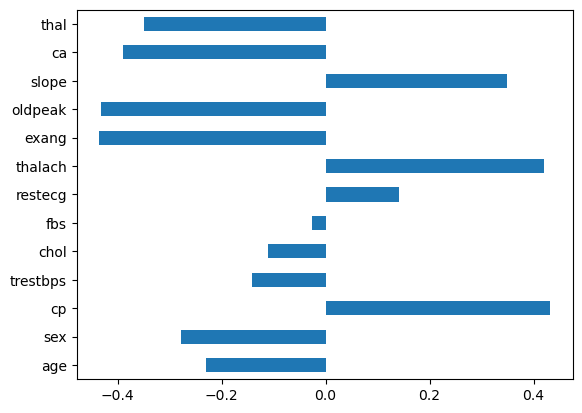

In [63]:
heart_data.corr()['target'].drop('target').plot(kind='barh');

<Axes: >

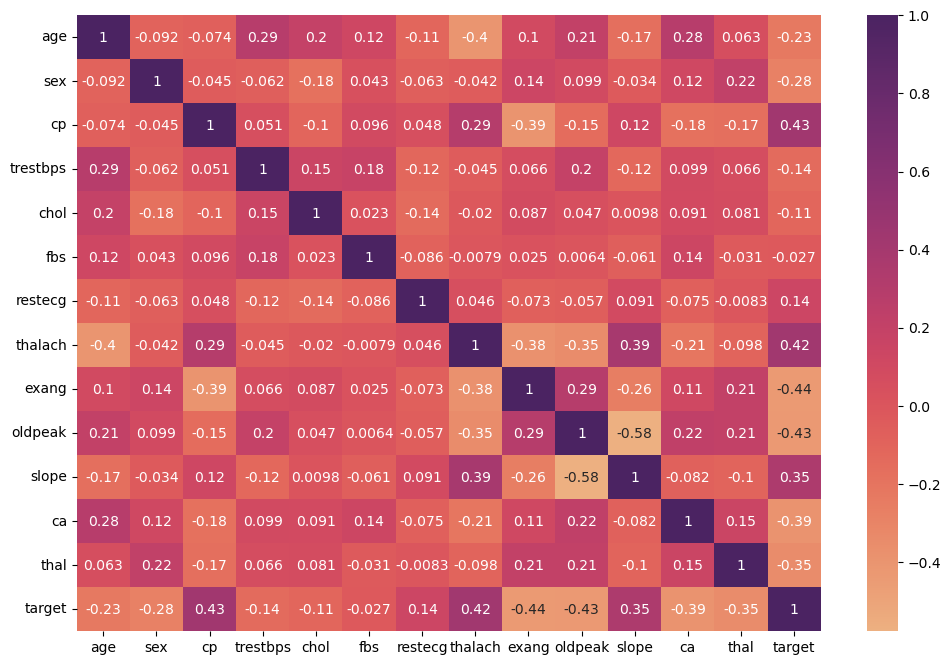

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(heart_data.corr(), square=False, cmap='flare', annot=True)

In [65]:
heart_data.corr()['target'].drop('target').sort_values()

exang      -0.435601
oldpeak    -0.432927
ca         -0.390431
thal       -0.348641
sex        -0.277867
age        -0.230720
trestbps   -0.142466
chol       -0.111147
fbs        -0.026826
restecg     0.140706
slope       0.348569
thalach     0.421096
cp          0.432080
Name: target, dtype: float64

#### Dive deeper into thr cp column (Chest Pain Type)

In [66]:
heart_data.cp.head(10)

0    3
1    2
2    1
3    1
4    0
5    0
6    1
7    1
8    2
9    2
Name: cp, dtype: int64

##### Feature distribution

In [67]:
cp_distribution = heart_data.cp.value_counts(normalize=True).sort_index()
cp_distribution

cp
0    0.473510
1    0.165563
2    0.284768
3    0.076159
Name: proportion, dtype: float64

##### Heart disease rates for each feature value

In [68]:
heart_disease_by_cp = heart_data.groupby('cp').target.mean()
heart_disease_by_cp

cp
0    0.272727
1    0.820000
2    0.790698
3    0.695652
Name: target, dtype: float64

##### Plot cp vs target

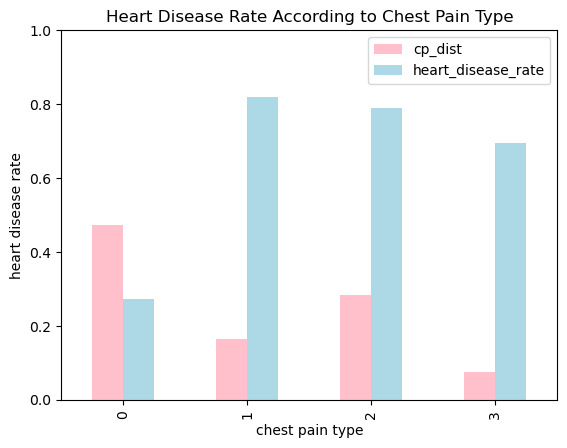

In [69]:
cp_stats = pd.DataFrame({'cp_dist':cp_distribution, 'heart_disease_rate':heart_disease_by_cp})
cp_stats.plot(kind='bar',color=['pink', 'lightblue'])
plt.xlabel('chest pain type')
plt.ylabel('heart disease rate')
plt.ylim(0, 1)
plt.title('Heart Disease Rate According to Chest Pain Type');

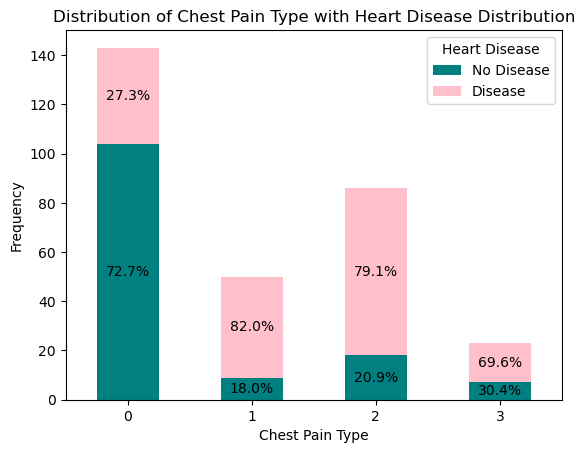

In [70]:
crosstab = pd.crosstab(heart_data['cp'], heart_data['target'])

# Plotting the bar chart
ax = crosstab.plot(kind='bar', stacked=True, color=['teal', 'pink']) 
plt.title('Distribution of Chest Pain Type with Heart Disease Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])

#Calculate the percentage
for i, (col0, col1) in enumerate(zip(crosstab[0], crosstab[1])):
    total = col0 + col1
    percentage_no_disease = (col0 / total * 100)
    percentage_disease = (col1 / total * 100)
    ax.text(i, col0/2, f'{percentage_no_disease:.1f}%', ha='center', va='center', color='black')
    ax.text(i, col0 + col1/2, f'{percentage_disease:.1f}%', ha='center', va='center', color='black')

plt.show()

The graph shows the distribution of chest pain types in relation to the presence or absence of heart disease. It's evident that type 0 chest pain is the most prevalent, with the majority of patients experiencing this type not suffering from heart disease. Furthermore, it's clear that types 2 and 1 chest pain are predominantly associated with patients who do suffer from heart disease.

#### Dive deeper into exang column (exercise induced angina)

In [71]:
heart_data.exang.head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: exang, dtype: int64

##### Feature distribution

In [72]:
exang_distribution = heart_data.exang.value_counts(normalize=True).sort_index()
exang_distribution

exang
0    0.672185
1    0.327815
Name: proportion, dtype: float64

##### Heart disease rates for each feature value

In [73]:
heart_disease_by_exang = heart_data.groupby('exang').target.mean()
heart_disease_by_exang 

exang
0    0.694581
1    0.232323
Name: target, dtype: float64

##### Plot exang vs target

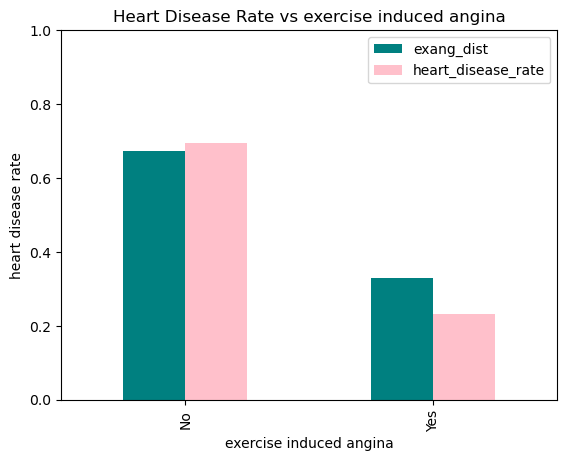

In [74]:
exang_stats = pd.DataFrame({'exang_dist':exang_distribution, 'heart_disease_rate':heart_disease_by_exang})
exang_stats.index = exang_stats.index.map({1:'Yes', 0:'No'})
exang_stats.plot(kind='bar',color=['teal', 'pink'])
plt.xlabel('exercise induced angina')
plt.ylabel('heart disease rate')
plt.ylim(0, 1)
plt.title('Heart Disease Rate vs exercise induced angina');

Most patients do not experience exercise-induced angina. Interestingly, the absence of exercise-induced angina is associated with a higher prevalence of heart disease, suggesting that patients who do not exhibit this symptom are more likely to have heart disease compared to those who do.

#### Deep dive into ca column (number of major vessels (0-3) colored by flourosopy)

In [75]:
heart_data.ca.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: ca, dtype: int64

##### Feature distribution

In [76]:
ca_distribution = heart_data.ca.value_counts(normalize=True).sort_index()
ca_distribution

ca
0    0.576159
1    0.215232
2    0.125828
3    0.066225
4    0.016556
Name: proportion, dtype: float64

##### Heart disease rates for each feature value

In [77]:
heart_disease_by_ca = heart_data.groupby('ca').target.mean()
heart_disease_by_ca 

ca
0    0.741379
1    0.323077
2    0.184211
3    0.150000
4    0.800000
Name: target, dtype: float64

##### Plot ca vs target

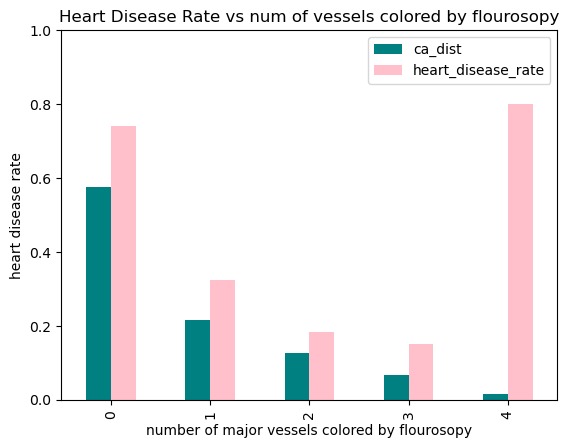

In [78]:
ca_stats = pd.DataFrame({'ca_dist':ca_distribution, 'heart_disease_rate':heart_disease_by_ca})
ca_stats.plot(kind='bar',color=['teal', 'pink'])
plt.xlabel('number of major vessels colored by flourosopy')
plt.ylabel('heart disease rate')
plt.ylim(0, 1)
plt.title('Heart Disease Rate vs num of vessels colored by flourosopy');

Patients with no major vessels colored by fluoroscopy represent the majority and are more likely to have heart disease compared to those with one to three colored vessels. Notably, while the rate of heart disease decreases as the number of colored vessels increases from one to three, there is a surprising rise in heart disease rates among the very few patients with four colored vessels.

## Data Cleaning

#### Check for missing values

In [79]:
heart_data.isna().mean()

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

##### No missing values

#### Check if all the values are numeric

In [80]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

##### Categorical columns to 1-hot

In [81]:
heart_data = pd.get_dummies(heart_data, columns=['cp', 'restecg', 'thal'])
heart_data.head(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,...,False,True,False,False,True,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,...,True,False,False,True,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,...,True,False,False,False,True,False,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,...,False,False,False,False,True,False,False,False,True,False
5,57,1,140,192,0,148,0,0.4,1,0,...,False,False,False,False,True,False,False,True,False,False
6,56,0,140,294,0,153,0,1.3,1,0,...,True,False,False,True,False,False,False,False,True,False
7,44,1,120,263,0,173,0,0.0,2,0,...,True,False,False,False,True,False,False,False,False,True
8,52,1,172,199,1,162,0,0.5,2,0,...,False,True,False,False,True,False,False,False,False,True
9,57,1,150,168,0,174,0,1.6,2,0,...,False,True,False,False,True,False,False,False,True,False


## Split the data to train and test sets

Given that the dataset's labels are quite balanced, as evidenced by the visualizations, we decided to skip advanced techniques for handling class imbalance. 

In [82]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with stratified sampling
test_size_fraction = 0.25
train, test = train_test_split(heart_data, test_size=test_size_fraction, random_state=0)
x_train, y_train = train.drop('target', axis=1), train['target']
x_test, y_test = test.drop('target', axis=1), test['target']


In [83]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((226, 21), (226,), (76, 21), (76,))

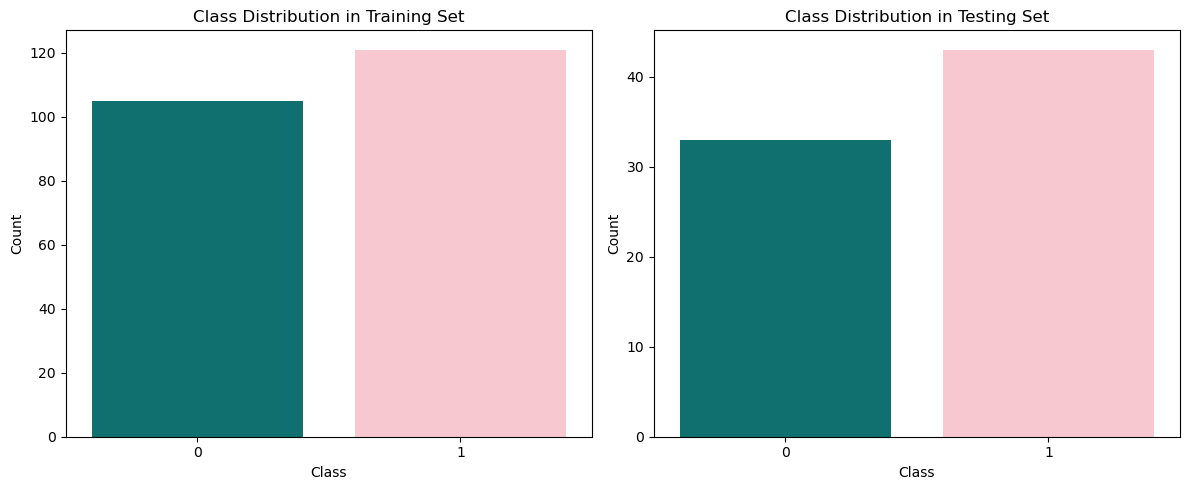

In [84]:
colors = ['teal', 'pink']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette=colors)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette=colors)
plt.title('Class Distribution in Testing Set')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Given the visual confirmation that the class distribution is maintained in both the training and testing sets even without using stratified sampling, we decided to reasonably skip stratified sampling for this dataset. This decision is particularly justified as the performance of our model is consistently better without it. By ensuring that the class distribution remains balanced in both sets, we can confidently proceed without stratified sampling, leveraging the naturally balanced distribution in our data.

Given that the labels in our classification problem are relatively balanced, accuracy will serve as a suitable metric for assessing the model's performance.

## Evaluation + Benchmark
##### The benchmark would be the most common label in the train set, In this case it's 1 (have heart disease), let's check its performance on both train and test

In [85]:
print('train:' , y_train.value_counts())
print('test:' ,y_test.value_counts())

class_counts = y_test.value_counts(normalize=True) * 100
print("Percentage of each target variable in the test data:")
print(class_counts)

class_counts = y_train.value_counts(normalize=True) * 100
print("Percentage of each target variable in the train data:")
print(class_counts)

train: target
1    121
0    105
Name: count, dtype: int64
test: target
1    43
0    33
Name: count, dtype: int64
Percentage of each target variable in the test data:
target
1    56.578947
0    43.421053
Name: proportion, dtype: float64
Percentage of each target variable in the train data:
target
1    53.539823
0    46.460177
Name: proportion, dtype: float64


In [86]:
# create a function to print the differenr model results 
def plot_model_results(model, x_train_scaled, y_train, x_test_scaled, y_test, title_suffix=''):
    # Predict the training and testing sets
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    # Calculate accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy ({title_suffix}):", train_acc)
    print(f"Testing Accuracy ({title_suffix}):", test_acc)

    # Calculate recall score for the testing set
    model_recall = recall_score(y_test, y_test_pred)
    print(f"Recall ({title_suffix}):", model_recall)

    # Compute confusion matrix
    model_cm = confusion_matrix(y_test, y_test_pred)

    # Calculate the probabilities for each class
    y_train_prob = model.predict_proba(x_train_scaled)[:, 1]
    y_test_prob = model.predict_proba(x_test_scaled)[:, 1]

    # Compute ROC curve
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

    # Compute AUC score
    auc_score = roc_auc_score(y_test, y_test_prob)
    print(f"AUC Score ({title_suffix}):", auc_score)

    # Plot confusion matrix and ROC curve side by side
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(model_cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title(f'Confusion Matrix {title_suffix}')

    plt.subplot(1, 2, 2)
    plt.plot(fpr_train, tpr_train, label='Train ROC Curve')
    plt.plot(fpr_test, tpr_test, label='Test ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve {title_suffix}')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [87]:

# benchmark_value = 0
# y_train_pred = np.full_like(y_train, fill_value=benchmark_value)
# y_test_pred = np.full_like(y_test, fill_value=benchmark_value)
# train_acc = accuracy_score(y_train, y_train_pred)
# test_acc = accuracy_score(y_test, y_test_pred)
# print("Training Accuracy:", train_acc)
# print("Testing Accuracy:", test_acc)




Training Accuracy (Benchmark): 0.5353982300884956
Testing Accuracy (Benchmark): 0.5657894736842105
Recall (Benchmark): 1.0
AUC Score (Benchmark): 0.5


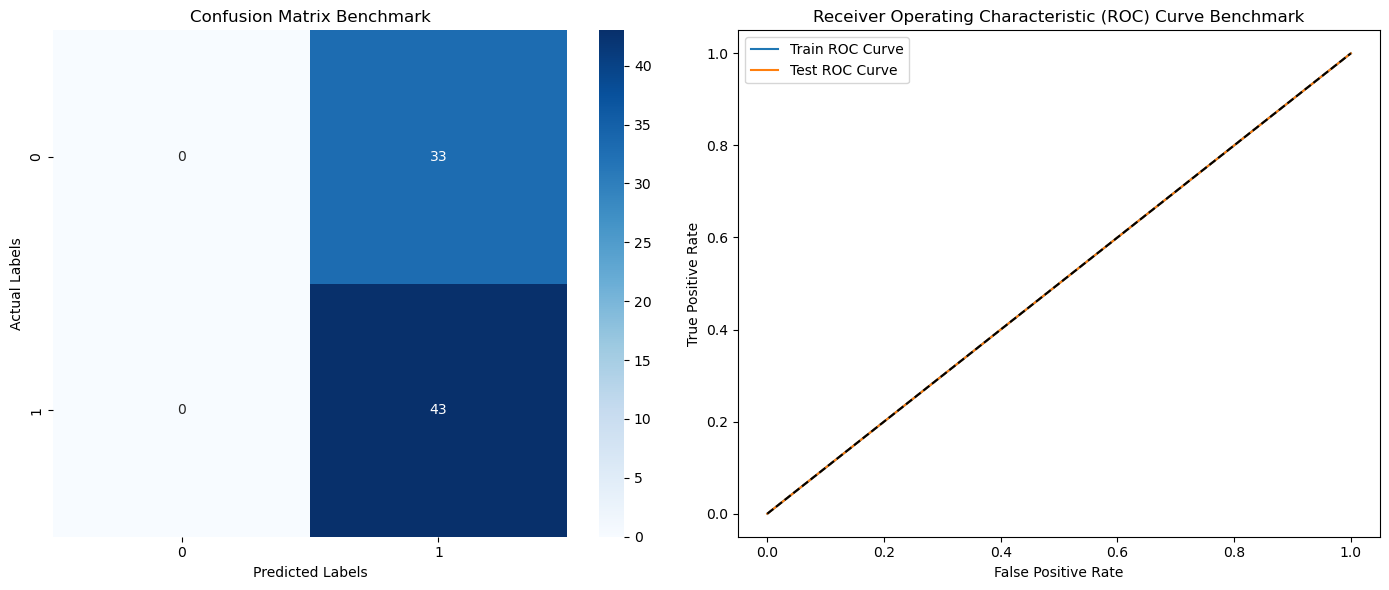

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Create the benchmark model
benchmark_model = DummyClassifier(strategy="most_frequent")

# Fit the benchmark model (no need to scale data for benchmark)
benchmark_model.fit(x_train, y_train)

# Use the plot_model_results function to visualize the benchmark model results
plot_model_results(benchmark_model, x_train, y_train, x_test, y_test, title_suffix='Benchmark')

##### The performance on train and test is almost equal, 0.4605 and 0.4426, our best algorithm should beat the test performance

Given the characteristics of our dataset, which is concise and free from outliers, and considering the presence of numerous binary features, we decided to apply Min-Max scaling.
We applied Min-Max scaling to the KNN and SVM models. These models rely on distance calculations and benefit from having features on a common scale.
 We did not apply scaling to the Random Forest and AdaBoost models. These models are based on decision trees, which are not sensitive to the scale of the features. Specifically, our AdaBoost model uses decision trees as the base estimator, further reinforcing the decision to avoid scaling for these models.

In [96]:
# scale the x values
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## KNN

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 7}
Training Accuracy (KNN): 0.831858407079646
Testing Accuracy (KNN): 0.8289473684210527
Recall (KNN): 0.8372093023255814
AUC Score (KNN): 0.9009866102889357


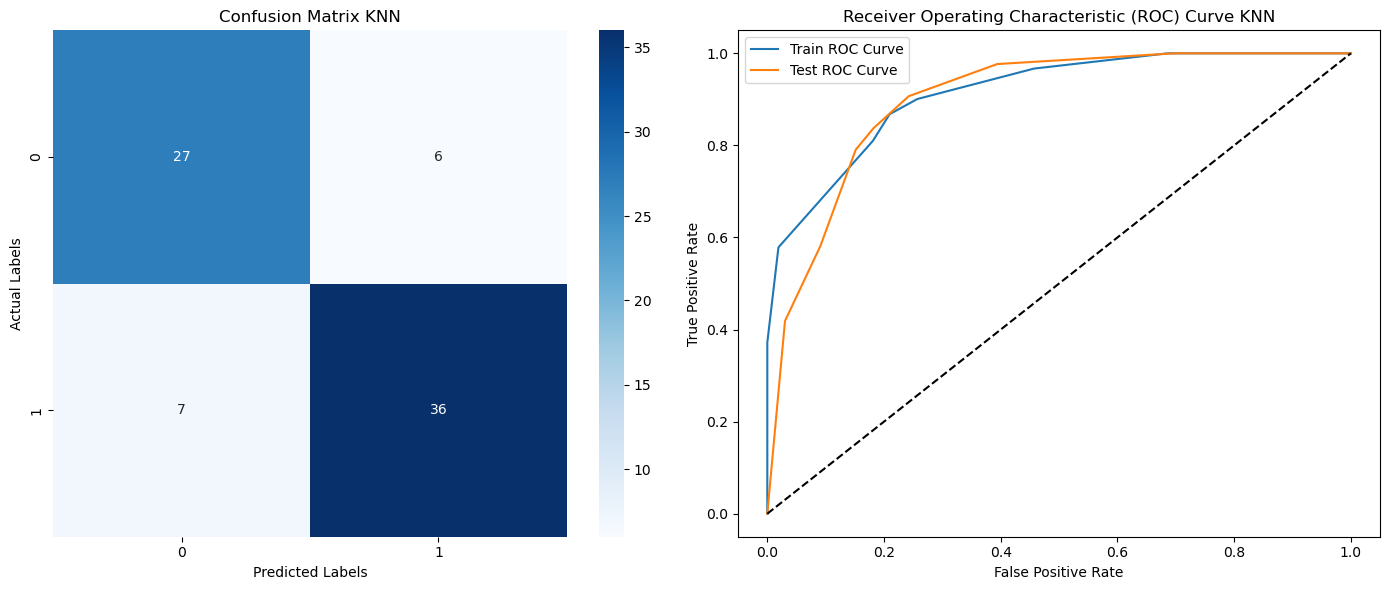

In [97]:

knn = KNeighborsClassifier()

# Creating Params for our class
params_knn = {'n_neighbors':[1,3,5,7,9,11], 'metric': ['euclidean', 'manhattan']}

# Running the model with GridSearchCV class
grid_knn = GridSearchCV(knn, params_knn, cv=6, n_jobs=-1)
grid_knn.fit(x_train_scaled, y_train)
print("Best parameters found: ", grid_knn.best_params_)


# print the model results 
plot_model_results(grid_knn, x_train_scaled, y_train, x_test_scaled, y_test, title_suffix='KNN')

We want to check and compare our accuracy and our Recall in the different models, that is becuase we want to Minimize the FN rate in our model (the worst case is that someone with heart disease will be targeted as a helthy person). The values of training and testing accuracies are close, suggest that our model has generalized well and isn't overfitting to the training data. 

## Random Forest

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy (Random Forest): 0.9026548672566371
Testing Accuracy (Random Forest): 0.8421052631578947
Recall (Random Forest): 0.8837209302325582
AUC Score (Random Forest): 0.9168428470754052


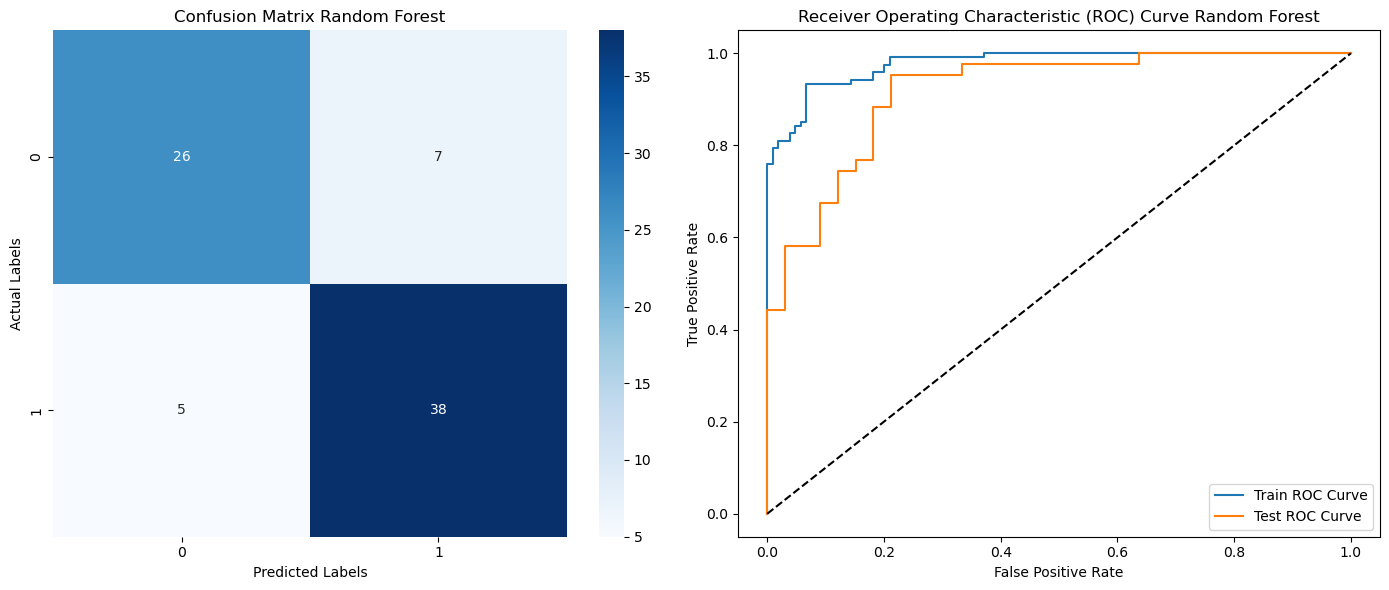

In [98]:
# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Define the hyperparameters to tune
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Running the model with GridSearchCV class
grid_rf = GridSearchCV(rf, params_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_rf.fit(x_train, y_train)
print("Best parameters found: ", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_

plot_model_results(best_rf, x_train, y_train, x_test, y_test, title_suffix='Random Forest')


## Ada Boost

Best parameters found:  {'algorithm': 'SAMME', 'estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 50}
Training Accuracy (AdaBoost): 0.8628318584070797
Testing Accuracy (AdaBoost): 0.8289473684210527
Recall (AdaBoost): 0.8604651162790697
AUC Score (AdaBoost): 0.9133192389006343


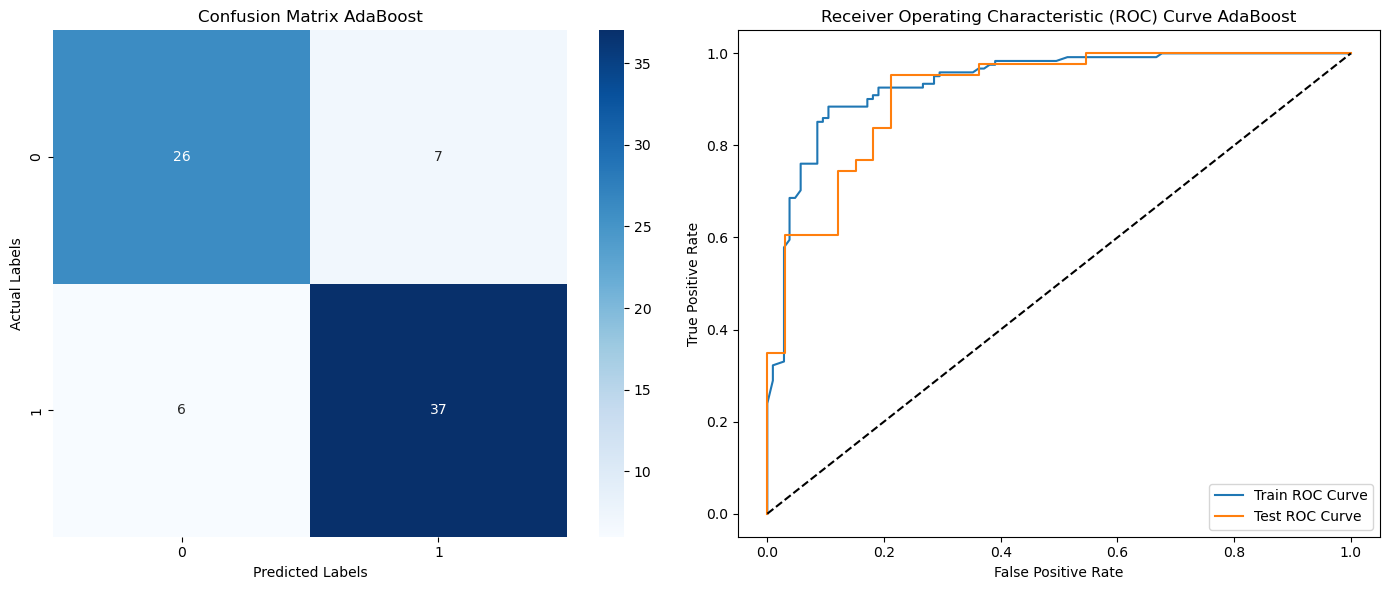

In [99]:
from sklearn.ensemble import AdaBoostClassifier

# Create the base estimator
base_estimator = DecisionTreeClassifier()

# Create the AdaBoost Classifier
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=0)

# Define the hyperparameters to tune
params_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Running the model with GridSearchCV class
grid_adaboost = GridSearchCV(adaboost, params_adaboost, cv=5, n_jobs=-1, scoring='accuracy')
grid_adaboost.fit(x_train, y_train)
print("Best parameters found: ", grid_adaboost.best_params_)

# Use the best estimator found by GridSearchCV
best_adaboost = grid_adaboost.best_estimator_

# Plot the model results using the best estimator
plot_model_results(best_adaboost, x_train, y_train, x_test, y_test, title_suffix='AdaBoost')

## SVM

Best parameters found:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Training Accuracy (SVM): 0.8672566371681416
Testing Accuracy (SVM): 0.8552631578947368
Recall (SVM): 0.9069767441860465
AUC Score (SVM): 0.9217758985200846


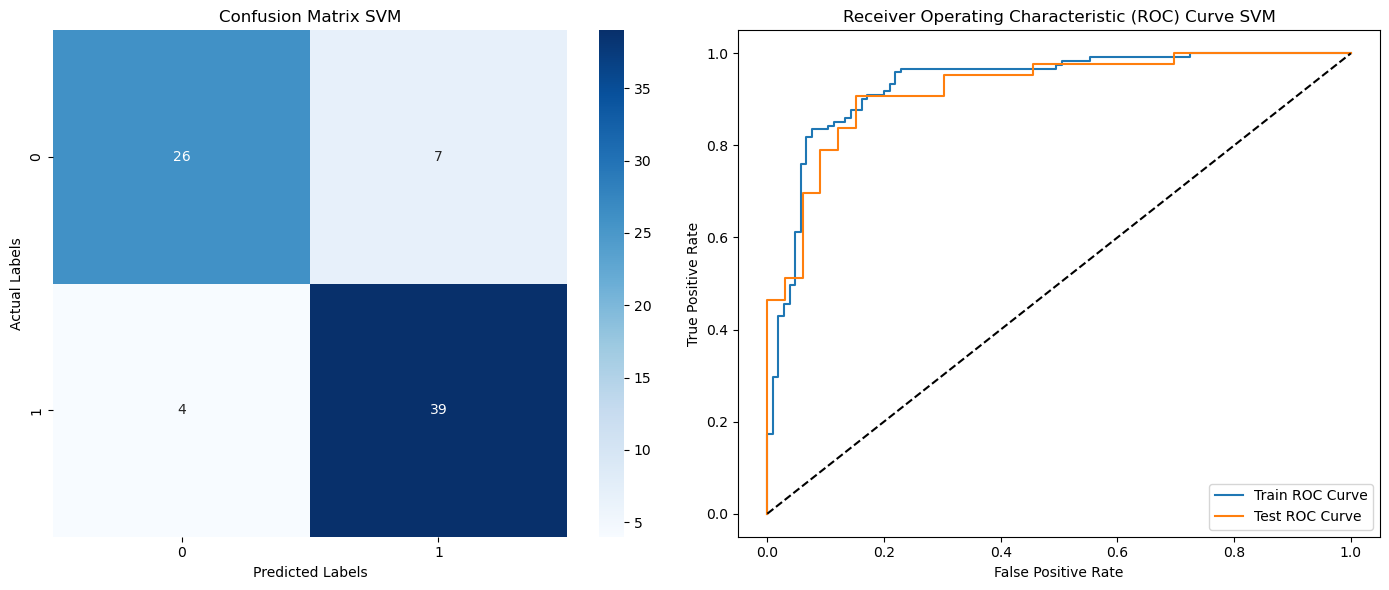

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create the SVM Classifier
svm_clf = SVC(probability=True, random_state=0)

# Define the hyperparameters to tune
params_svm = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Running the model with GridSearchCV class
grid_svm = GridSearchCV(svm_clf, params_svm, cv=5, n_jobs=-1, scoring='accuracy')
grid_svm.fit(x_train_scaled, y_train)
print("Best parameters found: ", grid_svm.best_params_)

# Use the best estimator found by GridSearchCV
best_svm = grid_svm.best_estimator_

# Plot the model results using the best estimator
plot_model_results(best_svm, x_train_scaled, y_train, x_test_scaled, y_test, title_suffix='SVM')


## Comparison

In [101]:

def calculate_model_metrics(model, x_train_scaled, y_train, x_test_scaled, y_test):
    # Predict the training and testing sets
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)

    # Calculate evaluation metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    model_recall = recall_score(y_test, y_test_pred)
    model_precision = precision_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Compute AUC score
    y_train_prob = model.predict_proba(x_train_scaled)[:, 1]
    y_test_prob = model.predict_proba(x_test_scaled)[:, 1]
    auc_score = roc_auc_score(y_test, y_test_prob)

    return {'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Recall': model_recall,
            'Precision': model_precision,
            'AUC': auc_score,
             'F1 Score': f1}


In [106]:
# Present the different models results in a table
models_metrics = {}

# Calculate metrics for each model
models_metrics['KNN'] = calculate_model_metrics(grid_knn, x_train_scaled, y_train, x_test_scaled, y_test)
models_metrics['Random Forest'] = calculate_model_metrics(best_rf, x_train, y_train, x_test, y_test)
models_metrics['AdaBoost'] = calculate_model_metrics(best_adaboost, x_train_scaled, y_train, x_test_scaled, y_test)
models_metrics['SVM'] = calculate_model_metrics(best_svm, x_train_scaled, y_train, x_test_scaled, y_test)

# Convert the dictionary to a DataFrame
df_metrics = pd.DataFrame(models_metrics).T
print(df_metrics)


               Train Accuracy  Test Accuracy    Recall  Precision       AUC  \
KNN                  0.831858       0.828947  0.837209   0.857143  0.900987   
Random Forest        0.902655       0.842105  0.883721   0.844444  0.916843   
AdaBoost             0.765487       0.750000  0.883721   0.730769  0.842142   
SVM                  0.867257       0.855263  0.906977   0.847826  0.921776   

               F1 Score  
KNN            0.847059  
Random Forest  0.863636  
AdaBoost       0.800000  
SVM            0.876404  


C:\Users\Lihi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lihi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lihi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lihi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


make it into a nice and clear table:

In [107]:
df_metrics = pd.DataFrame(models_metrics).T
df_metrics = df_metrics.round(3)

df_metrics.columns = ['Train Accuracy', 'Test Accuracy', 'Recall', 'Precision', 'F1 Score', 'AUC']

# Function to highlight the highest value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: pink' if v else '' for v in is_max]

# Apply the highlight_max function to the DataFrame
styled_df = df_metrics.style.apply(highlight_max, axis=0)

# Display the styled DataFrame
styled_df


,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score,AUC
KNN,0.832000,0.829000,0.837000,0.857000,0.901000,0.847000
Random Forest,0.903000,0.842000,0.884000,0.844000,0.917000,0.864000
AdaBoost,0.765000,0.750000,0.884000,0.731000,0.842000,0.800000
SVM,0.867000,0.855000,0.907000,0.848000,0.922000,0.876000


Inspect the various algorithms artifacts

age         -0.000000
sex         -0.000000
trestbps    -0.000000
chol        -0.000000
fbs         -0.000000
thalach      0.000000
exang       -0.000000
oldpeak     -0.000000
slope        0.000000
ca          -0.000000
cp_0        -0.054207
cp_1         0.000000
cp_2         0.000000
cp_3         0.000000
restecg_0   -0.000000
restecg_1    0.000000
restecg_2   -0.000000
thal_0       0.000000
thal_1      -0.000000
thal_2       0.115635
thal_3      -0.000000
dtype: float64


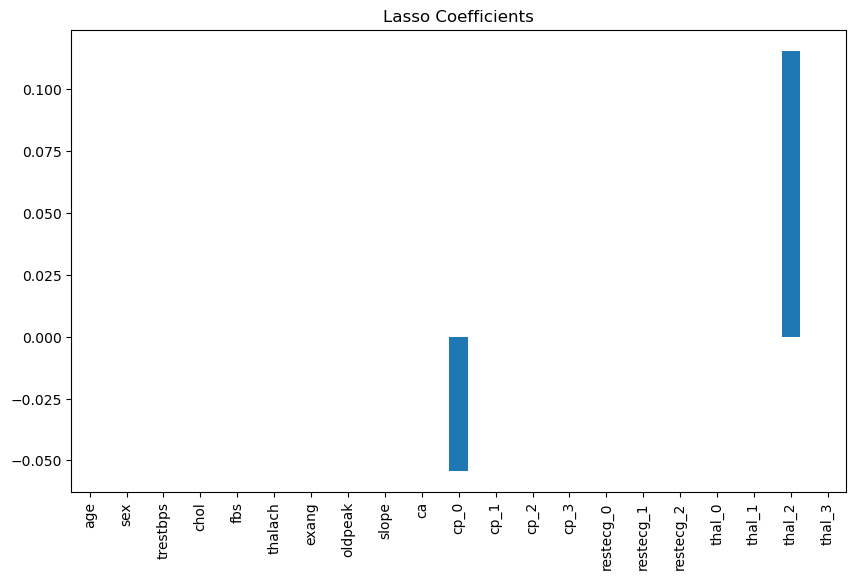

In [118]:
from sklearn.linear_model import Lasso

# Create and fit the Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)

# Get the coefficients
lasso_coefficients = pd.Series(lasso_model.coef_, index=x_train.columns)  # Use the original DataFrame's column names
print(lasso_coefficients)

# Plot the coefficients
plt.figure(figsize=(10, 6))
lasso_coefficients.plot(kind='bar', title='Lasso Coefficients')
plt.show()



Training size proportion: 0.1, Test accuracy: 0.8051
Training size proportion: 0.3, Test accuracy: 0.8396
Training size proportion: 0.5, Test accuracy: 0.8411
Training size proportion: 0.7, Test accuracy: 0.8242
Training size proportion: 0.75, Test accuracy: 0.8553
Training size proportion: 0.8, Test accuracy: 0.8689
Training size proportion: 0.9, Test accuracy: 0.9032


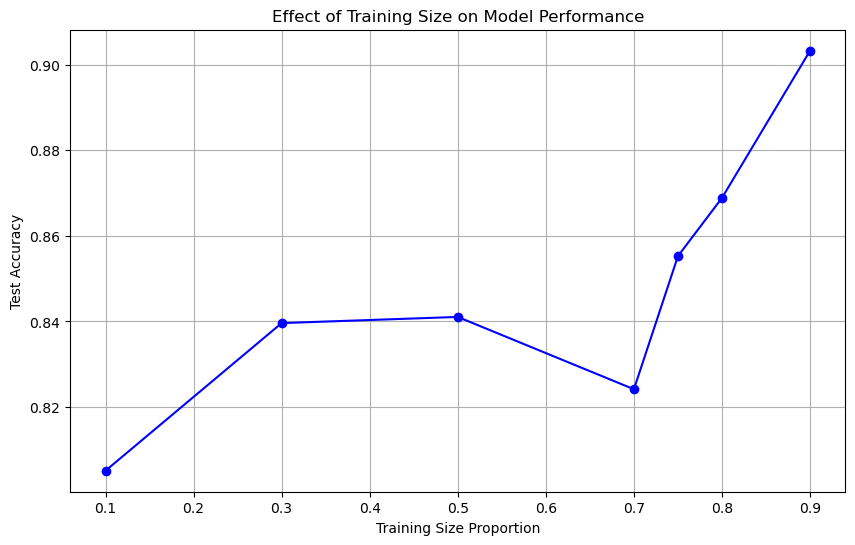

In [133]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define your proportions (ensure they are floats between 0 and 1)
proportions = [0.1, 0.3, 0.5, 0.7, 0.75, 0.8, 0.9]  # Example proportions

# Lists to store results
train_sizes = []
accuracies = []

for prop in proportions:
    # Calculate train size fraction from the proportion
    train_size_fraction = prop
    # Split the data into train and test sets
    train, test = train_test_split(heart_data, test_size=(1 - train_size_fraction), random_state=0)
    x_train, y_train = train.drop('target', axis=1), train['target']
    x_test, y_test = test.drop('target', axis=1), test['target']
    
    # Initialize and train the model
    clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
    clf.fit(x_train, y_train)
    
    # Evaluate the model
    score = clf.score(x_test, y_test)
    
    # Append results
    train_sizes.append(train_size_fraction)
    accuracies.append(score)
    print(f"Training size proportion: {train_size_fraction}, Test accuracy: {score:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Training Size Proportion')
plt.ylabel('Test Accuracy')
plt.title('Effect of Training Size on Model Performance')
plt.grid(True)
plt.show()
